<center> <h1> <b>SONGBIRDS<b></h1> </center>
<center> <h1>Introduction</h1> </center>

# Requirements

Import requires functions and birdsongs objects

In [29]:
import birdsongs as bs
from birdsongs.utils import *
from birdsongs.optimizer import *

In [2]:
root_path = "C:\\Users\\sebas\\Documents\\GitHub\\" # root_path = '/home/siete/Downloads/audios/'
bird_name = "Zonotrichia capensis"

paths  = bs.Paths(root_path, bird_name)
ploter = bs.Ploter(save=False)            # to save figures save=True 

The folder has 91 songs


# Song 

In [3]:
no_file = 1 # int(input("Enter the number of song (1 to {0}): ".format(paths.no_files)))
bird    = bs.Song(paths, no_file)   

The son has 5 syllables


## Plot

Visualize the song with ploter object

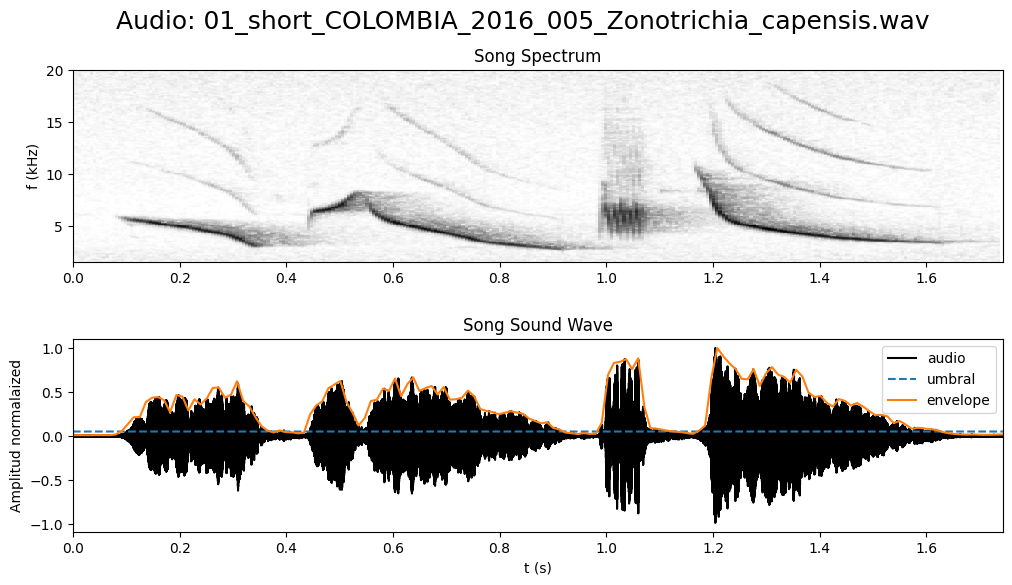

In [4]:
ploter.Plot(bird)

# Syllable


## Definition

In [5]:
no_syllable    = 1 # int(input("Enter the syllable number (1 to {0}): ".format(bird.no_syllables)))
syllable       = bird.Syllable(no_syllable)
syllable_synth = syllable.Solve(syllable.p)

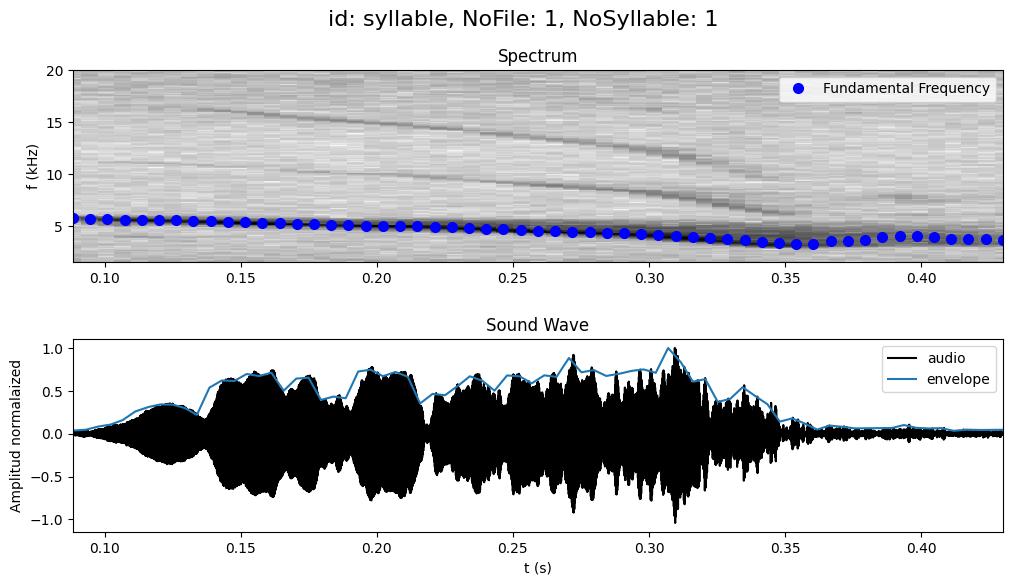

In [6]:
ploter.Plot(syllable)

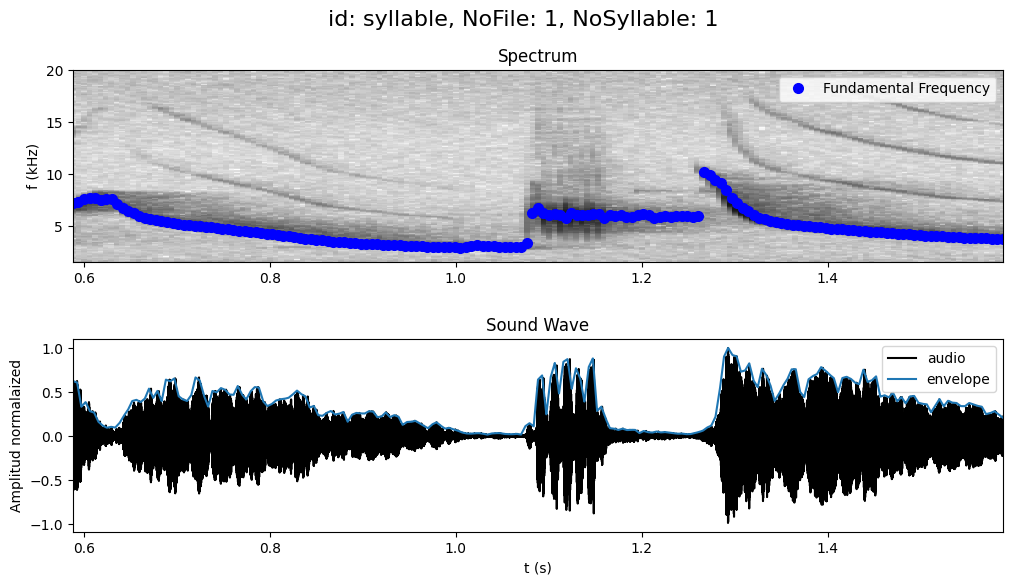

In [7]:
syl_test = bs.syllable.Syllable(bird.s, bird.fs, bird.t0, tlim=[0.5, 1.5])
syl_test.no_syllable = bird.no_syllable
syl_test.no_file     = bird.no_file
syl_test.paths       = bird.paths
syl_test.id          = "syllable"

ploter.Plot(syl_test)

## Plot

### Low

$ a_0 = 0.01 $

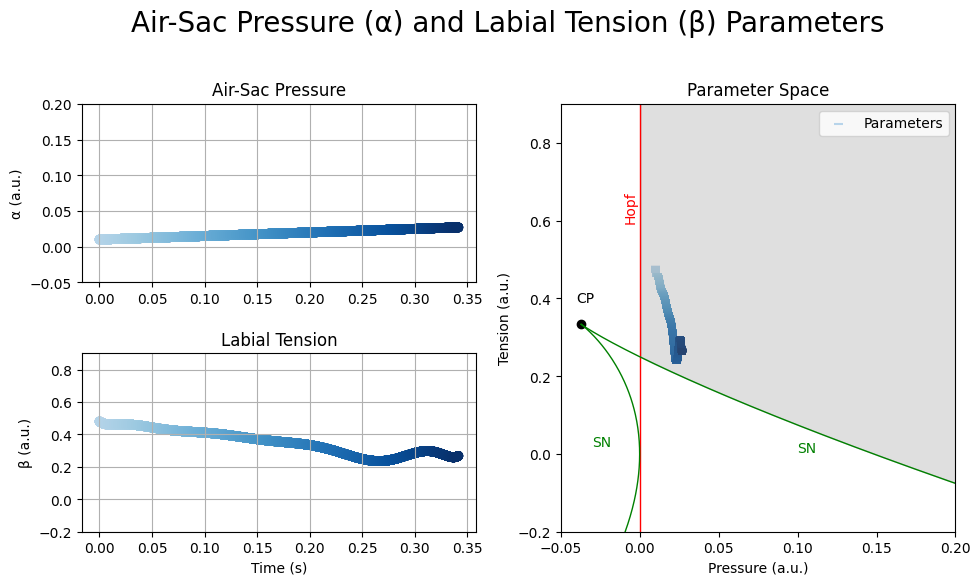

Wall time: 27.5 s


In [8]:
%%time
syllable.p["a0"].set(value=0.01)
syllable_synth = syllable.Solve(syllable.p)

# ploter.PlotVs(syllable_synth)
ploter.PlotAlphaBeta(syllable_synth)
ploter.Result(syllable, syllable_synth)

### Medium

$ a_0 = 0.11 $

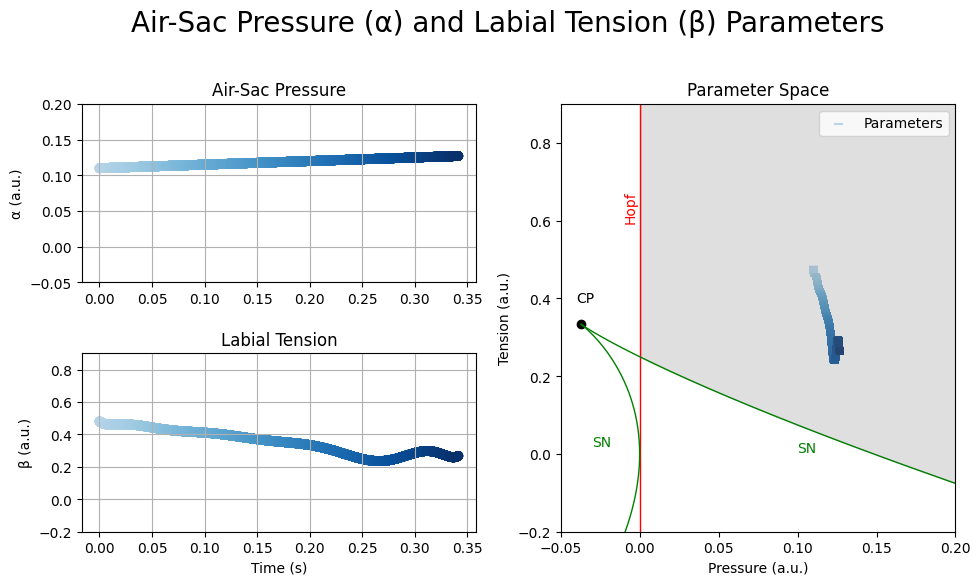

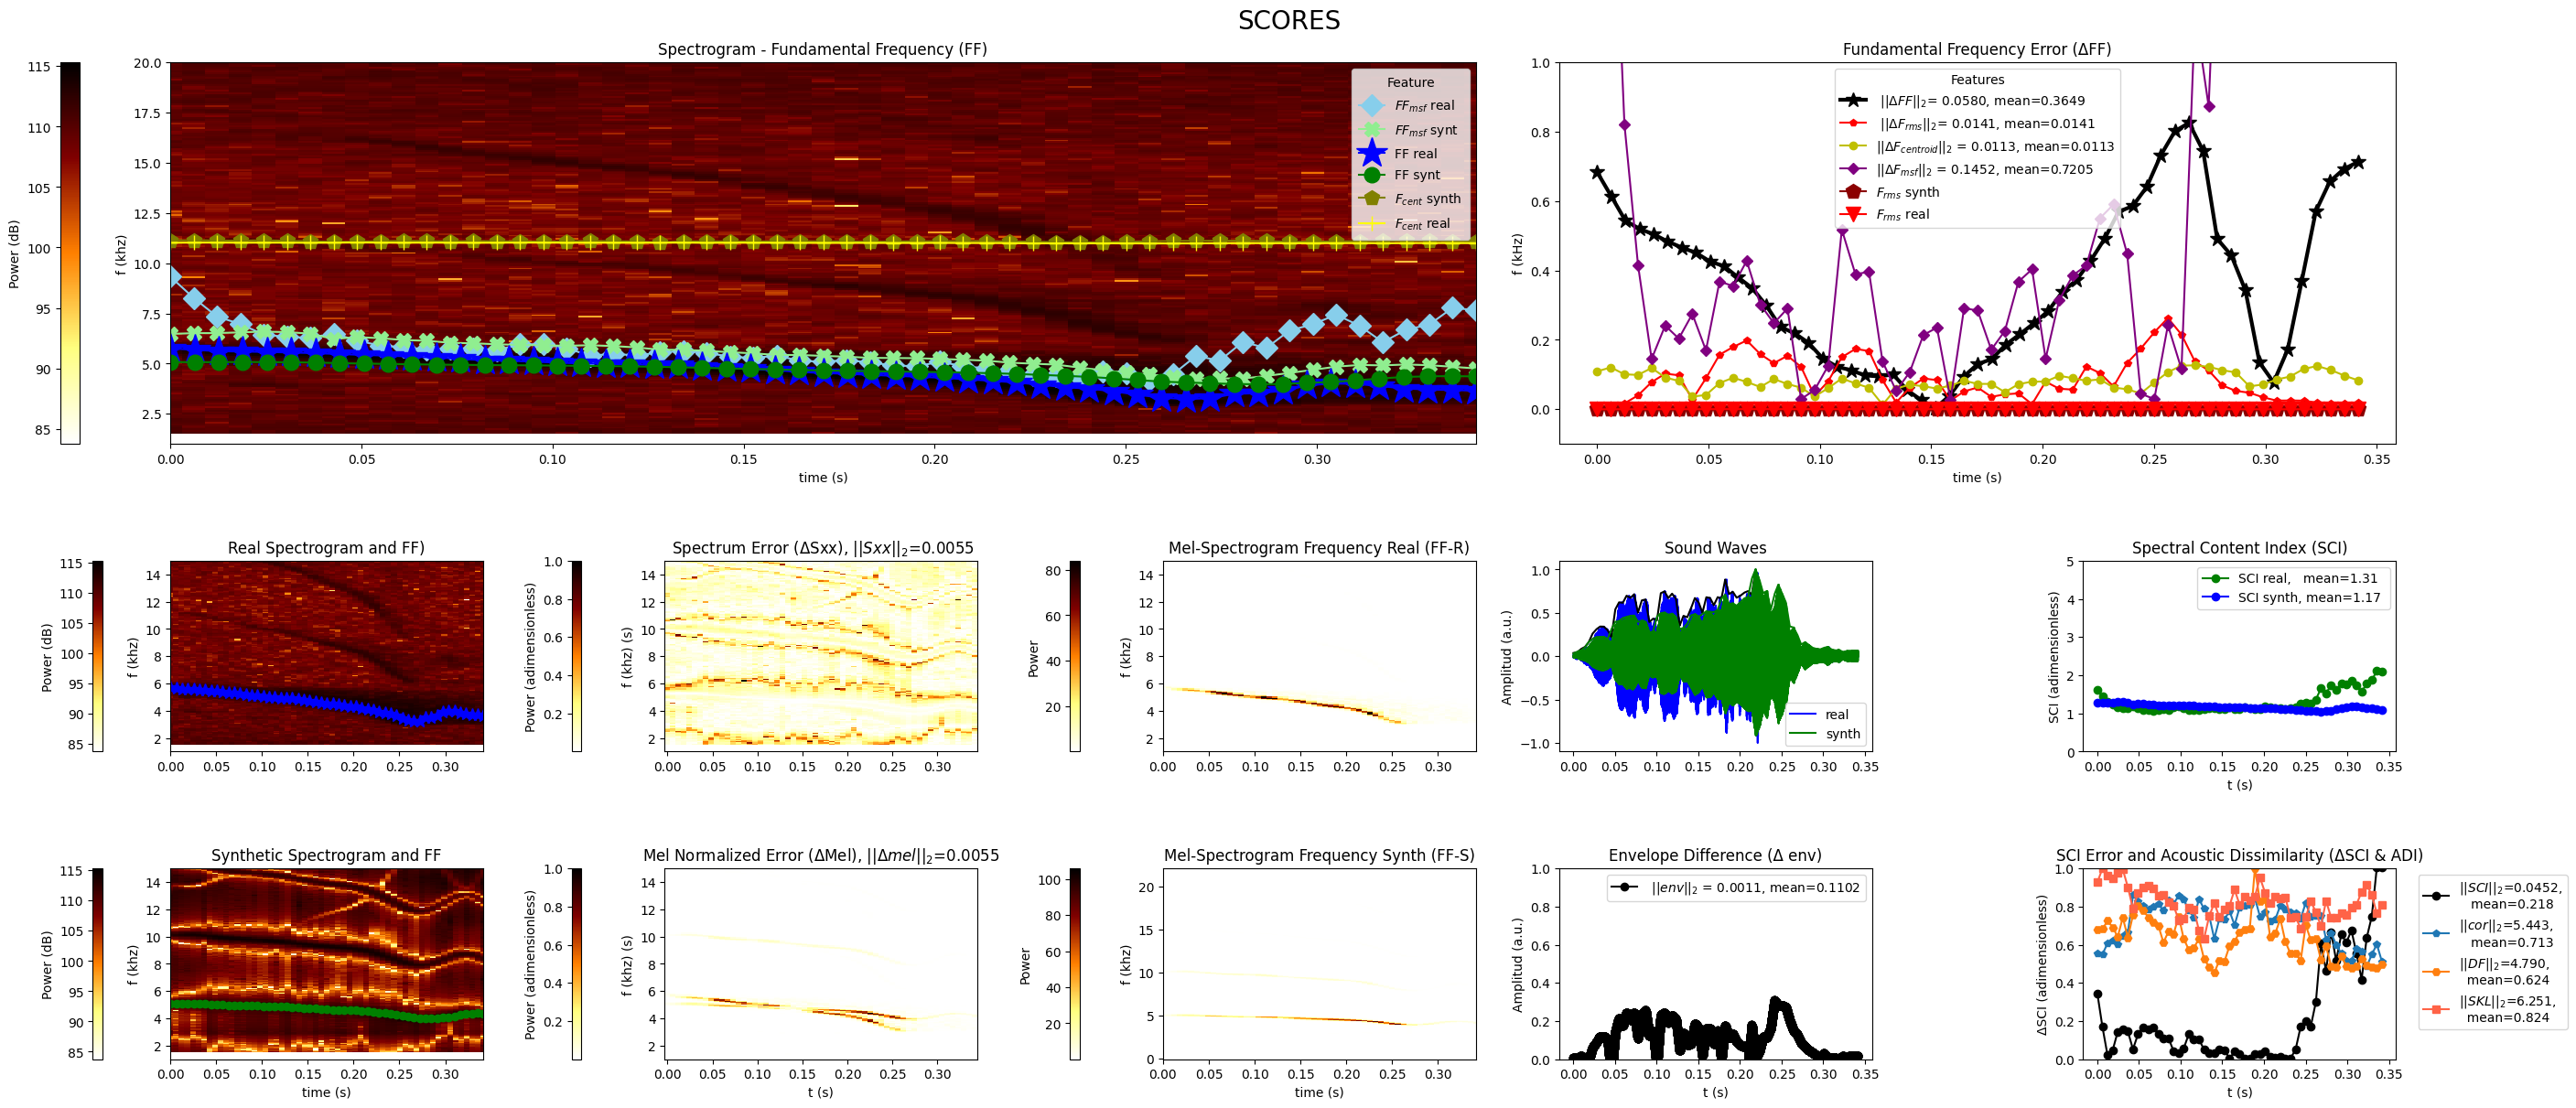

In [9]:
syllable.p["a0"].set(value=0.11)
syllable_synth = syllable.Solve(syllable.p)

ploter.PlotAlphaBeta(syllable_synth)
ploter.Result(syllable, syllable_synth)

### High

$ a_0 = 1.25 $

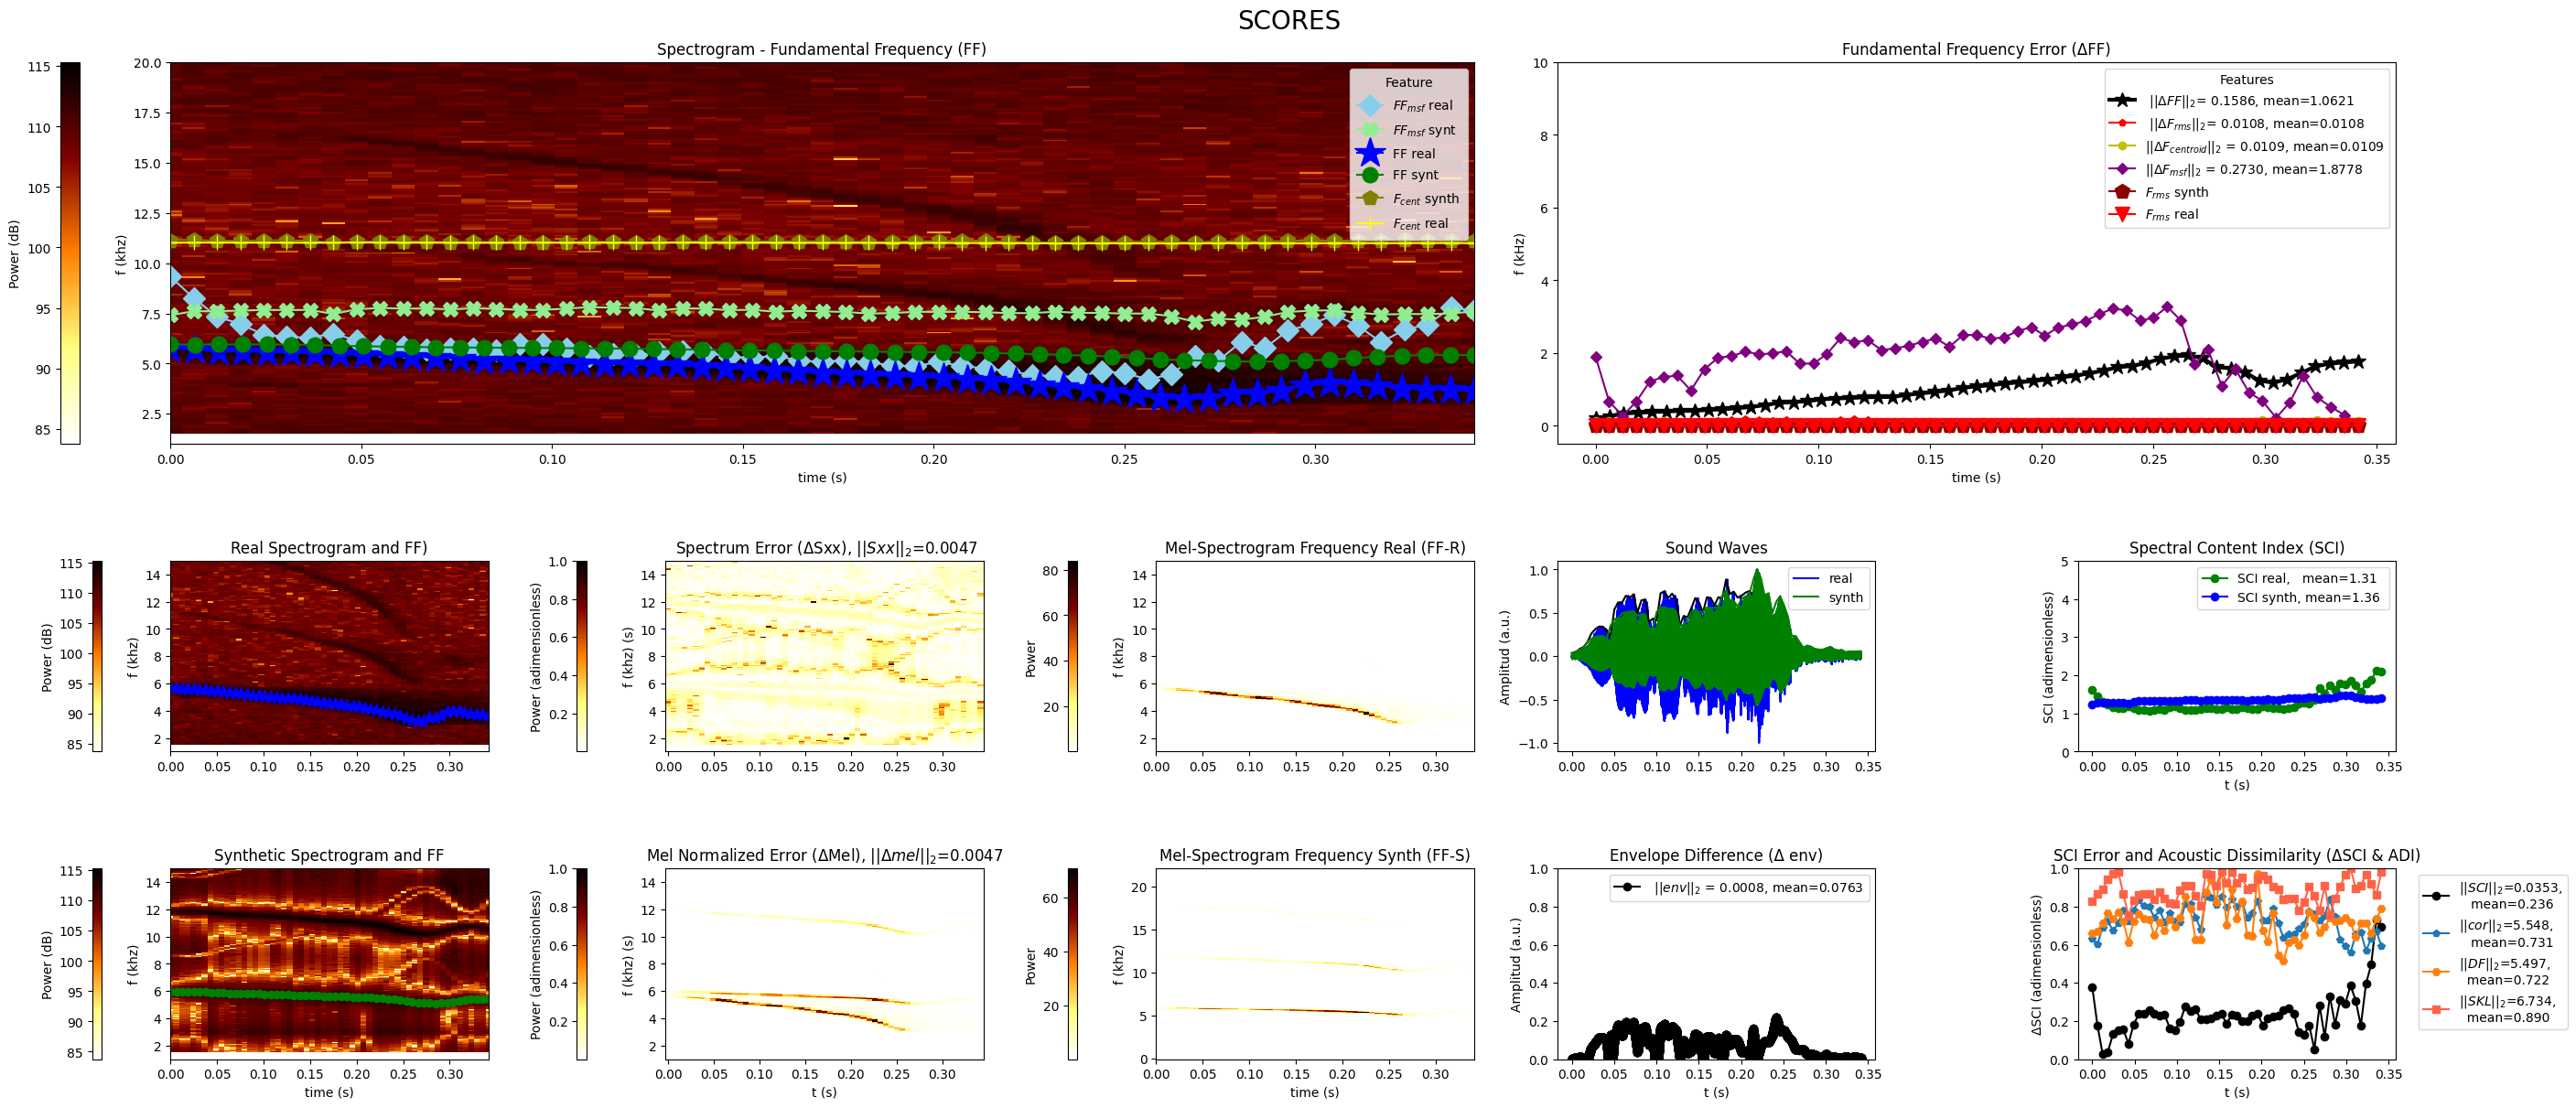

Wall time: 19.1 s


In [10]:
%%time
syllable.p["a0"].set(value=1.25)
syllable_synth = syllable.Solve(syllable.p)

ploter.PlotAlphaBeta(syllable_synth)
ploter.Result(syllable, syllable_synth)

# Chunck

## Definition


In [11]:
no_chunck = 0 # int(input("Enter the number of song (1 to {0}): ".format(bird.no_chuncks)))
chunck    = bird.Chunck(no_chunck)

In [12]:
Display(chunck.p)
chunck_synth = chunck.Solve(chunck.p)

Parameters([('a0', <Parameter 'a0', value=0.11 (fixed), bounds=[0:0.25]>), ('a1', <Parameter 'a1', value=0.05 (fixed), bounds=[-2:2]>), ('a2', <Parameter 'a2', value=0.0 (fixed), bounds=[0:2]>), ('b0', <Parameter 'b0', value=-0.1 (fixed), bounds=[-1:0.5]>), ('b1', <Parameter 'b1', value=1 (fixed), bounds=[0.2:2]>), ('b2', <Parameter 'b2', value=0.0 (fixed), bounds=[0:3]>), ('gm', <Parameter 'gm', value=40000.0 (fixed), bounds=[10000.0:100000.0]>)])

## Plot


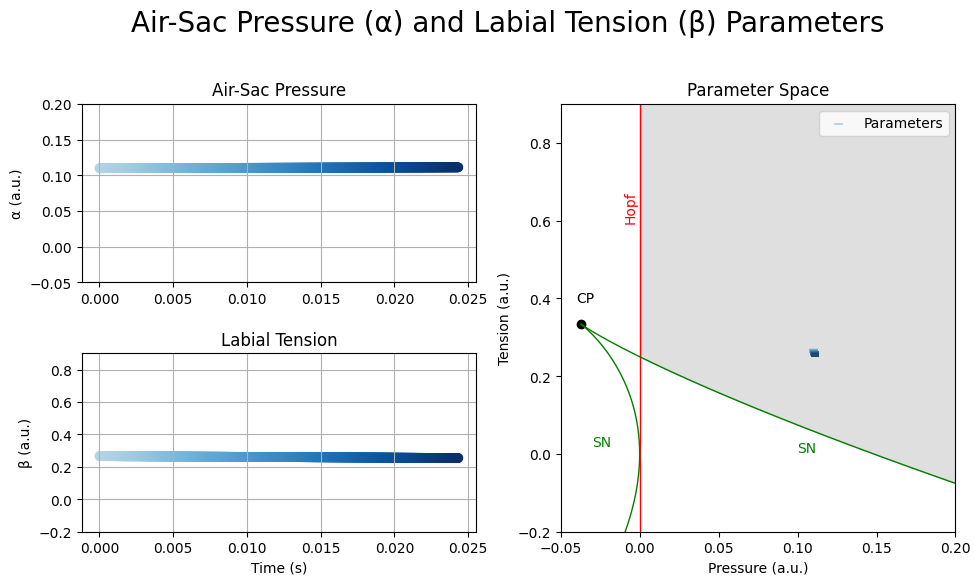

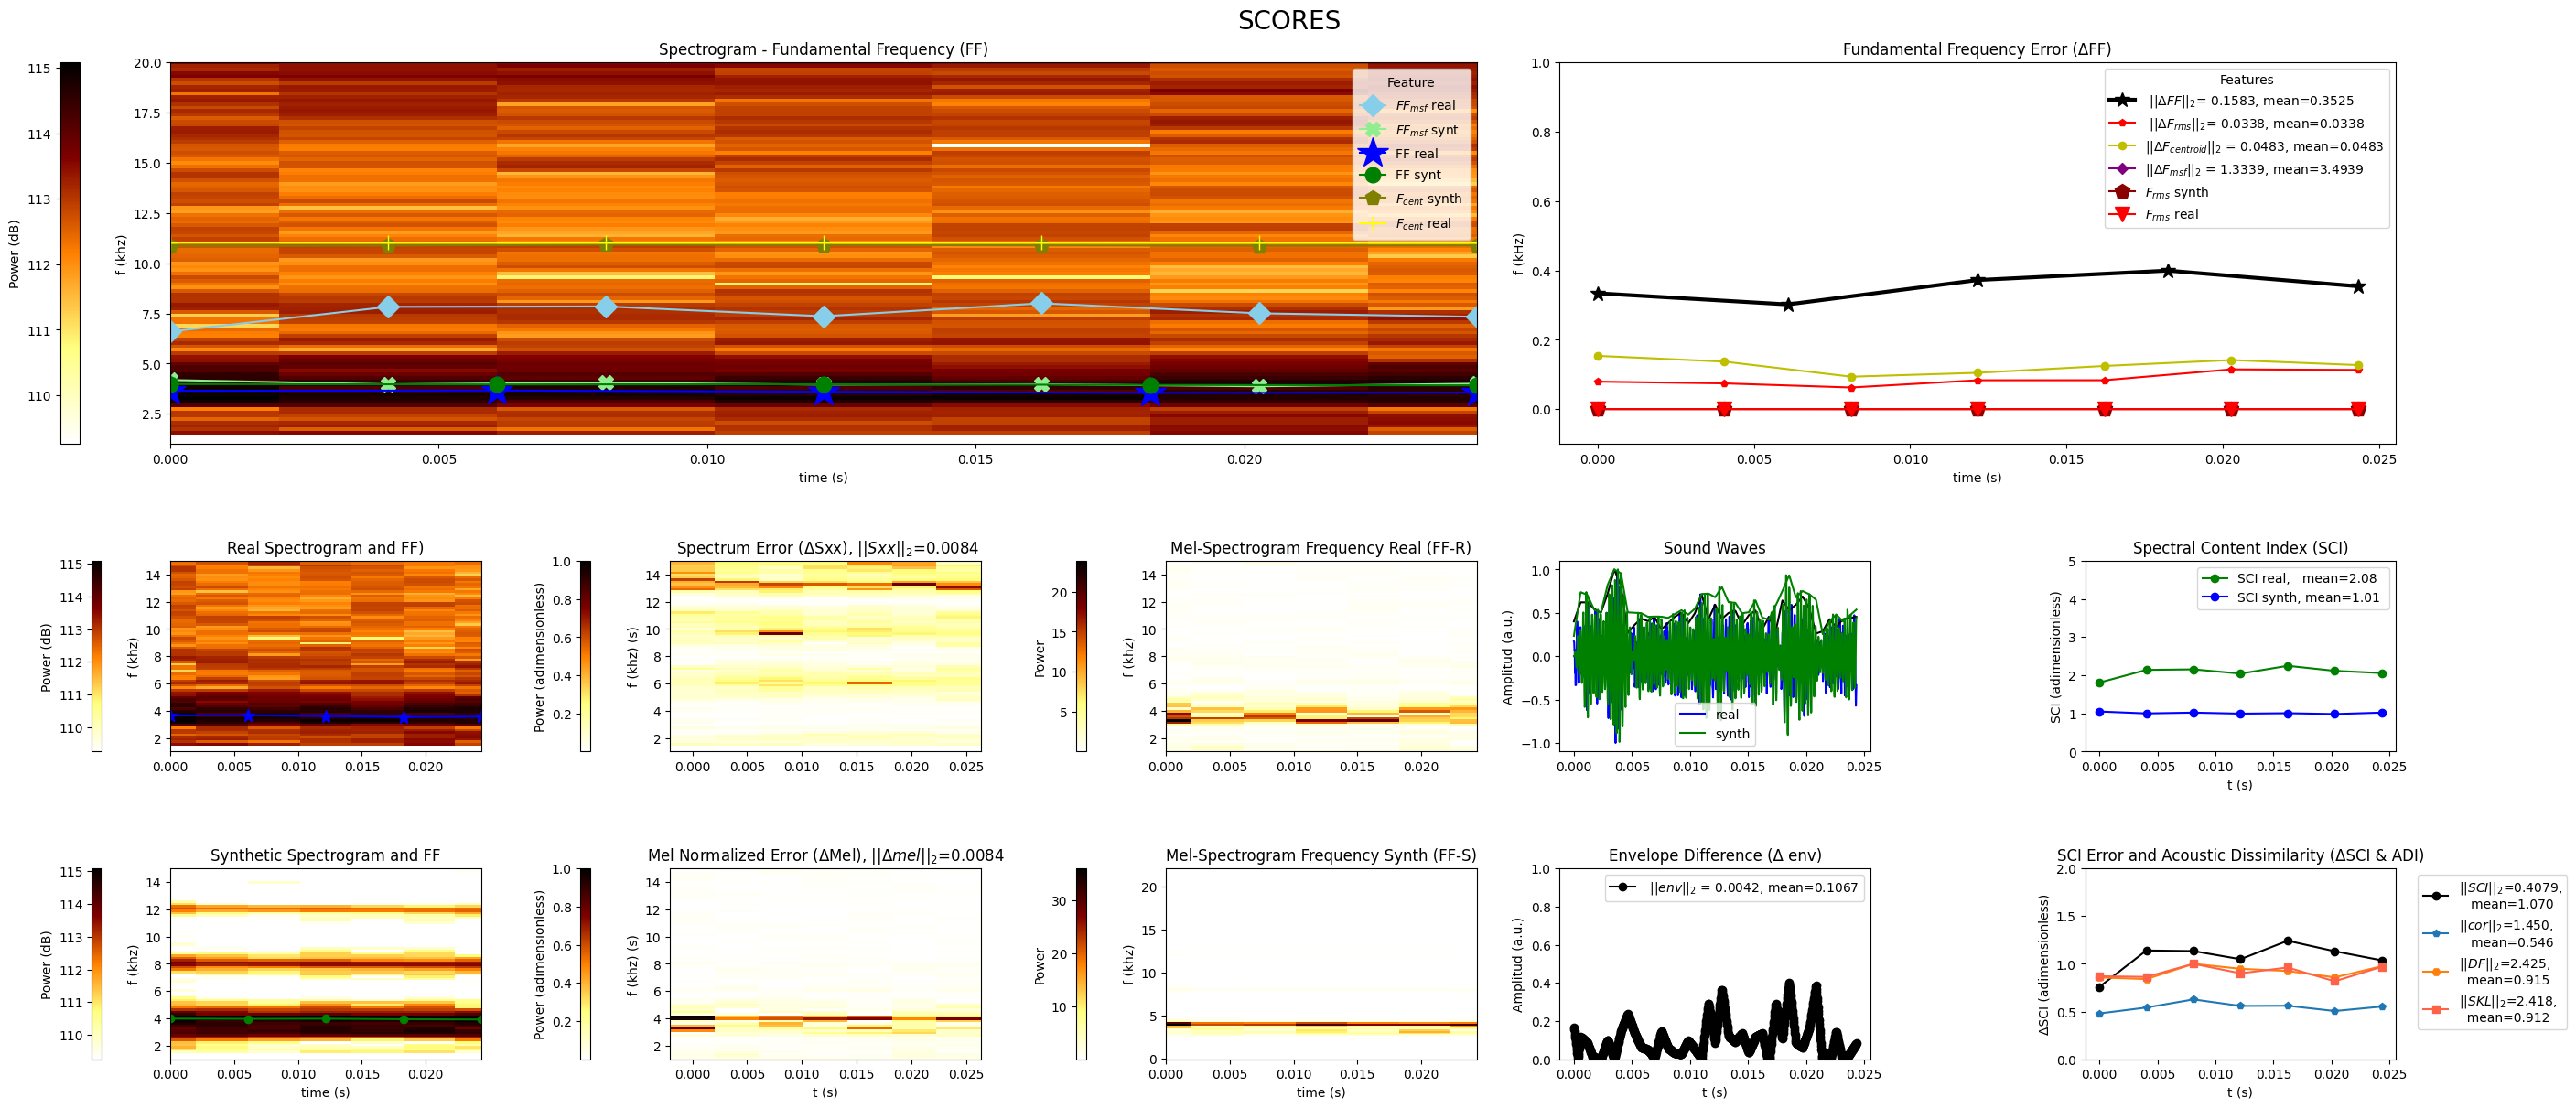

In [13]:
# ploter.Syllables(chunck, chunck_synth)
# ploter.PlotVs(chunck)
ploter.PlotAlphaBeta(chunck_synth)
ploter.Result(chunck, chunck_synth)

## All Objects


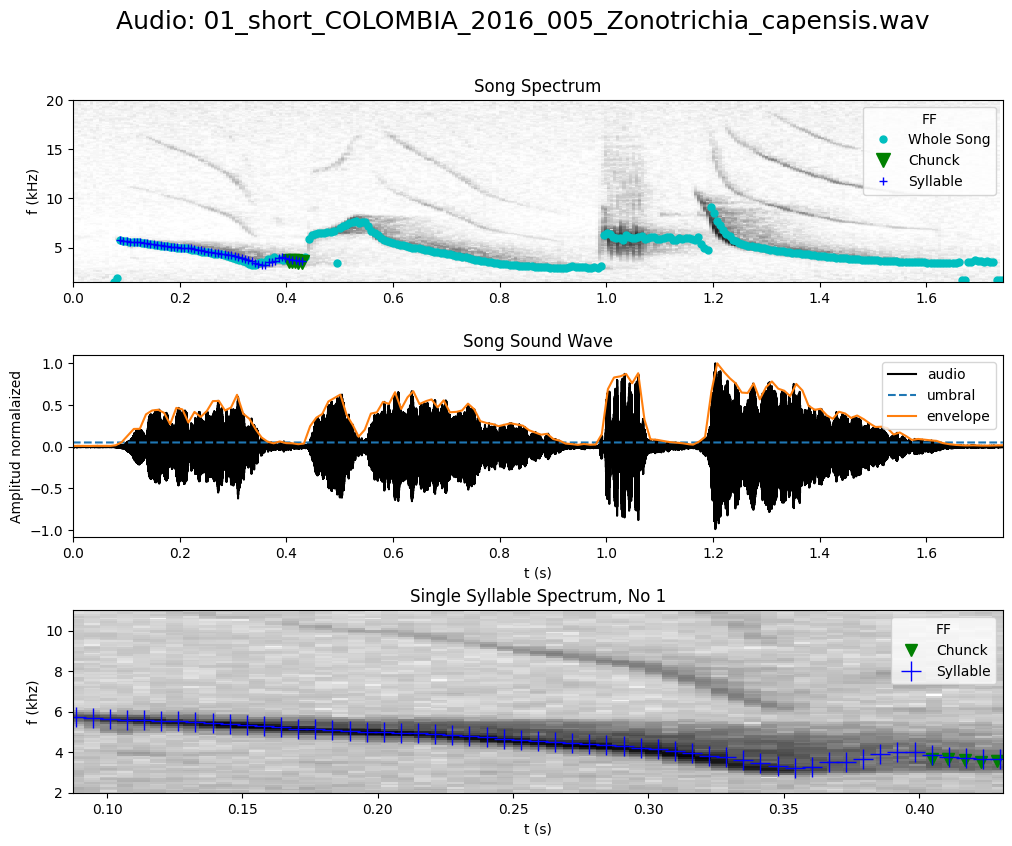

In [14]:
ploter.Plot(bird, syllable_on=True, chunck_on=True, FF_on=True)

# Optimization Problem

## General Problem

## Sub-Optimization Problems

## Optimization Solvers


In [15]:
brute         = {'method':'brute', 'Ns':21} #, 'workers':-1} 
DualAnnealing = {'method':'dual_annealing','max_nfev':200, 'maxiter': 100}

In [33]:
obj       = syllable # chunck
optimizer = bs.optimizer.Optimizer(obj, method_kwargs=brute)

In [34]:
#?lmfit.minimize

### Initial Synthetic Syllable


Parameters([('a0', <Parameter 'a0', value=0.25 (fixed), bounds=[0:0.25]>), ('a1', <Parameter 'a1', value=0.05 (fixed), bounds=[-2:2]>), ('a2', <Parameter 'a2', value=0.0 (fixed), bounds=[0:2]>), ('b0', <Parameter 'b0', value=-0.1 (fixed), bounds=[-1:0.5]>), ('b1', <Parameter 'b1', value=1 (fixed), bounds=[0.2:2]>), ('b2', <Parameter 'b2', value=0.0 (fixed), bounds=[0:3]>), ('gm', <Parameter 'gm', value=40000.0 (fixed), bounds=[10000.0:100000.0]>)])

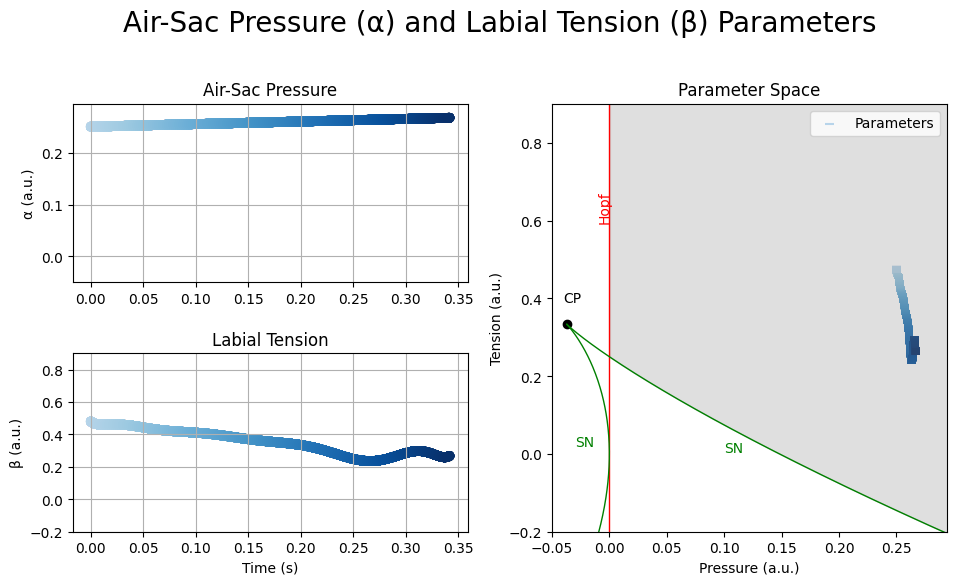

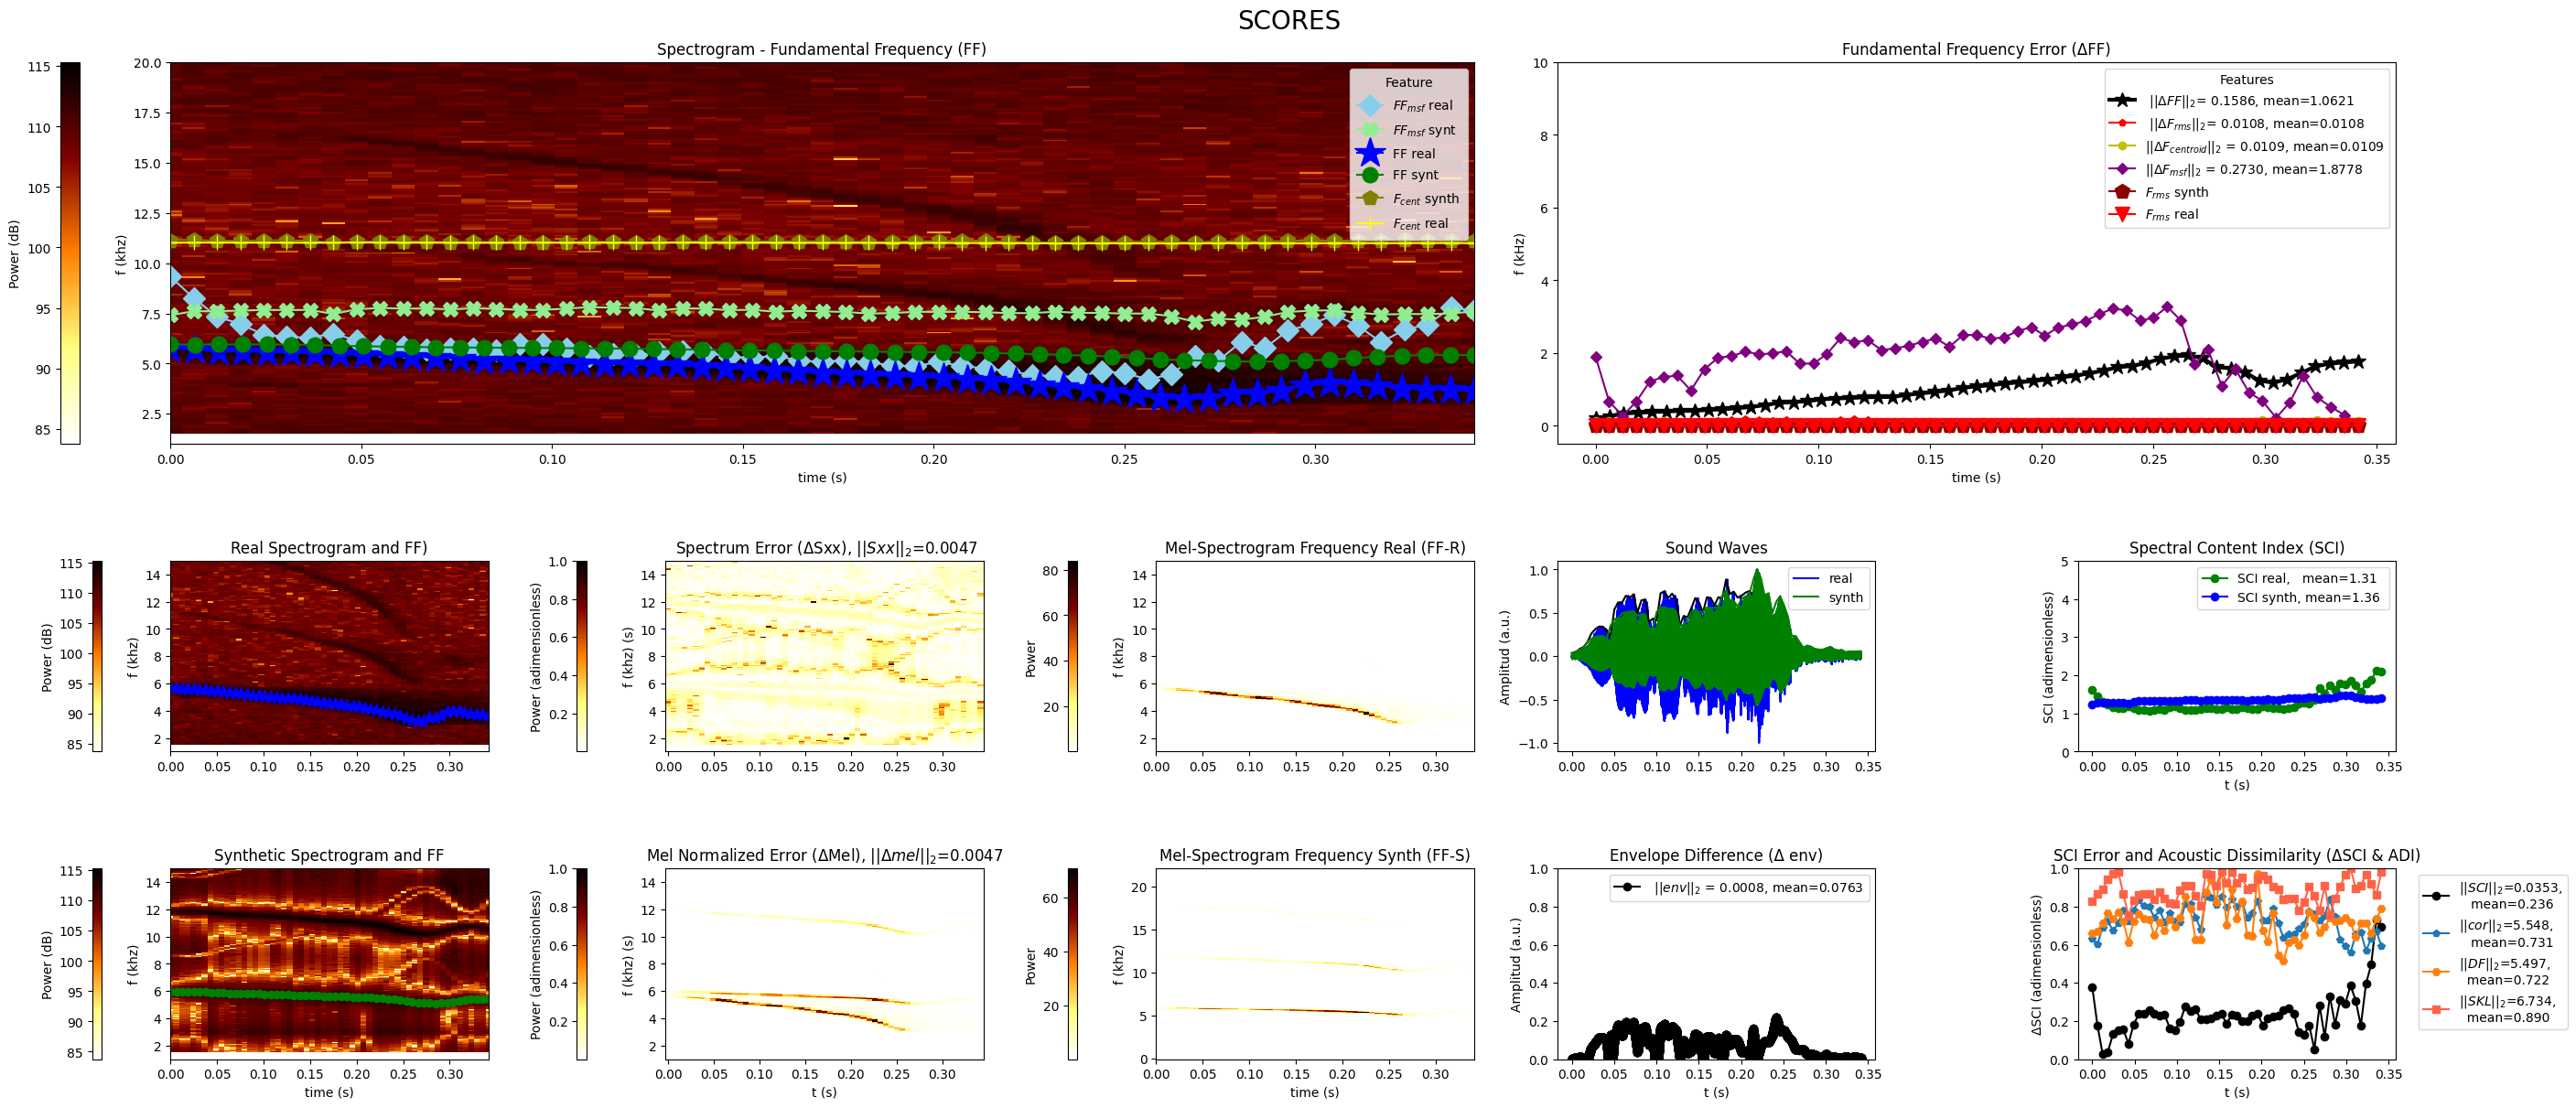

In [36]:
Display(obj.p)
obj_synth = obj.Solve(obj.p)

ploter.PlotAlphaBeta(obj_synth)
ploter.Result(obj, obj_synth)

## Optimal $\gamma$

In [37]:
Gammas = optimizer.AllGammas(bird)

γ* =  41500, t=5.5676 min


C:\Users\sebas\anaconda3\lib\site-packages\numpy\polynomial\polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)
C:\Users\sebas\anaconda3\lib\site-packages\numpy\polynomial\polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)
C:\Users\sebas\anaconda3\lib\site-packages\numpy\polynomial\polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)
C:\Users\sebas\anaconda3\lib\site-packages\numpy\polynomial\polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)
C:\Users\sebas\anaconda3\lib\site-packages\numpy\polynomial\polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)
C:\Users\sebas\anaconda3\lib\site-packages\numpy\polynomial\polynomial.py:1362: RankW

γ* =  46000, t=2.2040 min
γ* =  41500, t=7.3883 min
γ* =  46000, t=3.8162 min
γ* =  50500, t=8.0209 min


In [38]:
obj.p = optimizer.obj.p
optimizer.optimal_gamma

45100.0

### Plot 


Parameters([('a0', <Parameter 'a0', value=0.25 (fixed), bounds=[0:0.25]>), ('a1', <Parameter 'a1', value=0.05 (fixed), bounds=[-2:2]>), ('a2', <Parameter 'a2', value=0.0 (fixed), bounds=[0:2]>), ('b0', <Parameter 'b0', value=-0.1 (fixed), bounds=[-1:0.5]>), ('b1', <Parameter 'b1', value=1 (fixed), bounds=[0.2:2]>), ('b2', <Parameter 'b2', value=0.0 (fixed), bounds=[0:3]>), ('gm', <Parameter 'gm', value=45100.0 (fixed), bounds=[10000.0:100000.0]>)])

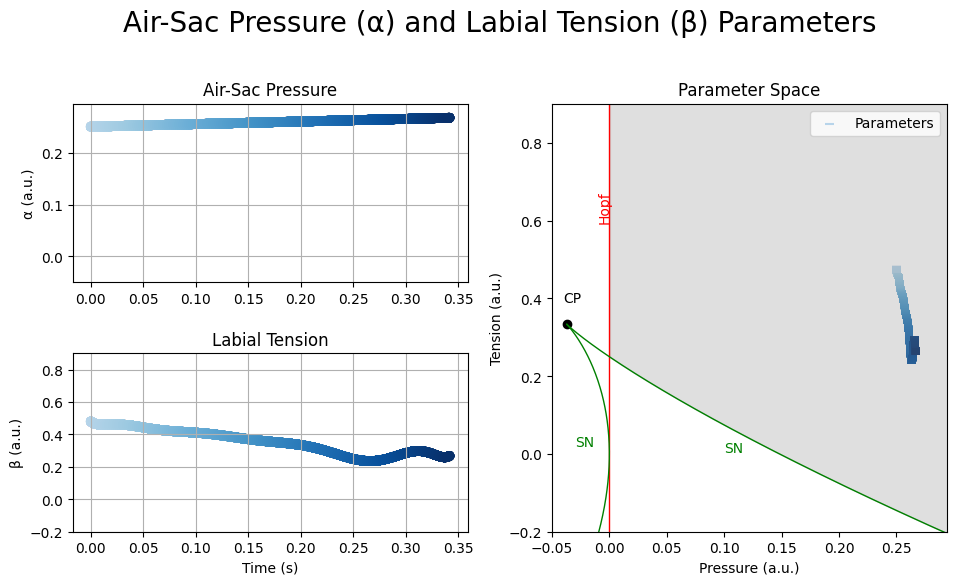

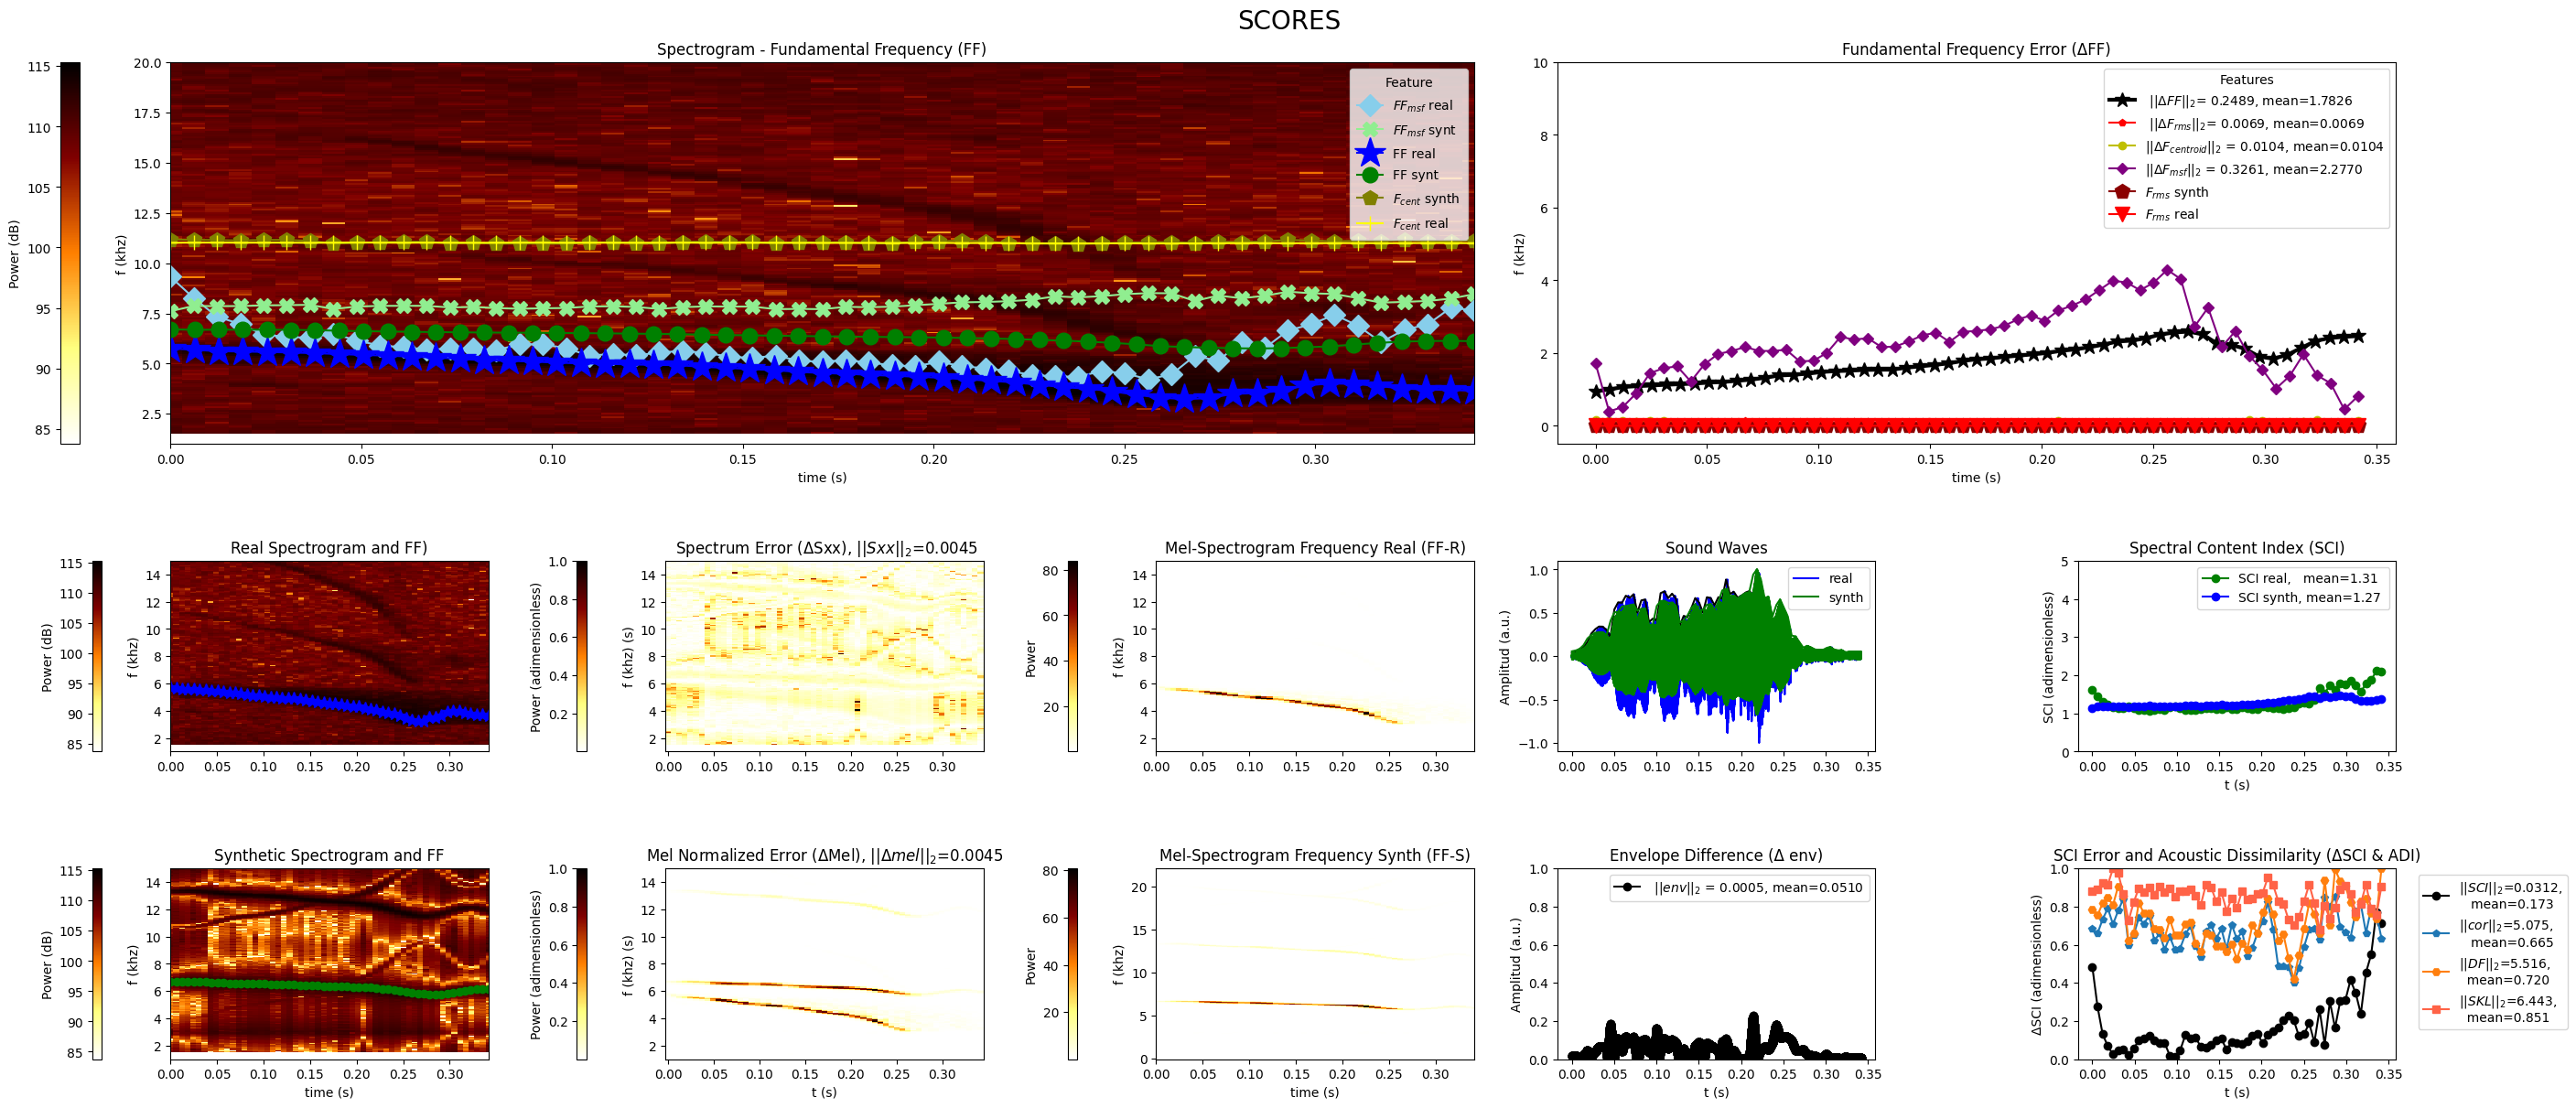

In [39]:
Display(obj.p)
obj_synth = obj.Solve(obj.p)

ploter.PlotAlphaBeta(obj_synth)
ploter.Result(obj, obj_synth)

## Optimal Parameters $\alpha_i$ and $\beta_i$
 

In [ ]:
optimizer.OptimalAs()
optimizer.OptimalBs()

### Optimal Parameters

In [ ]:
Display(obj.p)

In [ ]:
# optimizer.OptimalParameters()
# Display(obj.p)

### Plot Best Syllable


In [ ]:
Display(obj.p)
obj_synth = chunck.Solve(obj.p)

In [ ]:
# ploter.PlotVs(syllable_synth)
ploter.PlotAlphaBeta(obj_synth)
ploter.Result(obj, obj_synth)

### Write Audio


In [ ]:
obj.WriteAudio()
obj_synth.WriteAudio()

## Whole Song


In [ ]:
# piptrack(y=self.s, sr=self.fs, S=self.Sxx, n_fft=self.NN, hop_length=self.NN//2,
#          fmin=self.flim[0], fmax=self.flim[1], threshold=0.1, win_length=None, 
#          center=self.center, pad_mode='constant', ref=None)



In [ ]:
#y    = np.abs(np.fft.rfft(bird.silaba.out_amp)) #[5:-5]
#freq = np.fft.rfftfreq(bird.silaba.out_amp.size, d=1/bird.fs)#[5:-5]

#freq, y = freq[5:-5], y # remove inital and final peaks
#peaks, _ = find_peaks(y, distance=10, height=np.max(y)/10)
#peaks = peakutils.indexes(y, thres=0.5, min_dist=30)

#plt.plot(freq,y); #plt.xlim((1, 2e4))
#plt.plot(freq[peaks[0]], y[peaks[0]], "x")

In [1]:
# bird.WholeSong(brute, plot=True, syll_max=0)

In [ ]:
# Sxx,tn,fn,ext = sound.spectrogram(syllable.s, syllable.fs, fcrop=(2000,20000))   
# Sxx_dB = util.power2dB(Sxx)+96

# Sxx_dB_std05 = sound.smooth(Sxx_dB, std=0.5)
# Sxx_dB_std10 = sound.smooth(Sxx_dB, std=1)
# Sxx_dB_std15 = sound.smooth(Sxx_dB, std=1.5)

# import matplotlib.pyplot as plt 
# #fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1)
# util.plot2d(Sxx_dB,  title='original')#, vmin=10, vmax=70)
# util.plot2d(Sxx_dB_std05,   title='smooth (std=0.05)')#, vmin=10, vmax=70)
# util.plot2d(Sxx_dB_std10,   title='smooth (std=1)')#, vmin=10, vmax=70)
# util.plot2d(Sxx_dB_std15,   title='smooth (std=15.5)')#, vmin=10, vmax=70)
# fig.set_size_inches(7,9)
# fig.tight_layout()

In [ ]:

# fig, ax = plt.subplots()


# S_dB = librosa.power_to_db(s_mel)
# img = librosa.display.specshow(S_dB, x_axis='time',
#                          y_axis='mel', sr=obj.fs,
#                          fmax=8000, ax=ax)
# fig.colorbar(img, ax=ax, format='%+2.0f dB')
# ax.set(title='Mel-frequency spectrogram')

#plt.plot(times_on, onset_env, 'o')
#plt.plot(rolloff)

# feature.spectral_flatness(y=obj.s, S=None, n_fft=2048, hop_length=512, win_length=None, 
#                           center=True, pad_mode='constant', amin=1e-10, power=2.0)[source]

#fig, ax = plt.subplots()

# img2 = display.specshow(mfccs, x_axis='time', ax=ax)
# ax.set(title='HTK-style (dct_type=3)')
# fig.colorbar(img2, ax=[ax])


# img2 = display.specshow(contrast, x_axis='time', ax=ax)
# fig.colorbar(img2)
# ax.set(ylabel='Frequency bands', title='Spectral contrast')features.spectral_entropy(Sxx_power, fn, flim=(2000,10000)) 

## Video
- Create a function to make video

```` 
import os
os.system("ffmpeg -f image2 -r 1/5 -i ./images/swissGenevaLake%01d.jpg -vcodec mpeg4 -y ./videos/swissGenevaLake.mp4")
````

- Add audio to the video

````
ffmpeg -i yourvideo.avi -i sound.mp3 -c copy -map 0:v:0 -map 1:a:0 output.avi
````